# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Problem Statement

To identify and classify different types of weather using any open-source pre-trained models.

## Learning Objectives

At the end of this, you will be able to :

* Load and prepare the dataset
* Strengthen skills in the Transfer Learning area

In [ ]:
#@title Mini-hackathon walkthrough
from IPython.display import HTML

HTML("""<video width="854" height="480" controls>
  <source src="https://cdn.talentsprint.com/aiml/aiml_2020_b14_hyd/experiment_details_backup/Pytorch_CNN_cats_and_dogs.mp4" type="video/mp4">
</video>
""")

## Dataset

Multi-class weather dataset(MWD) for image classification is a valuable dataset contains 1125 images divided into four folders such as sunrise, shine, rain, and cloudy.

## Grading = 20 Marks

## Setup Steps

In [ ]:
#@title Run this cell to download the dataset

from IPython import get_ipython
ipython = get_ipython()
  
notebook="U4_MH1_Multi-class weather_Transfer_learning" #name of the notebook
Answer = "This notebook is graded by mentors on the day of hackathon"
def setup():
# 
   ipython.magic("sx wget http://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Multi-classWeatherDataset.zip")
   ipython.magic("sx unzip -qq Multi-classWeatherDataset.zip")
   print ("Setup completed successfully")
   return

setup()

Setup completed successfully


## Basic Pytorch packages

**torchvision:**  This package is used to load and prepare the dataset. Using this package we can perform/apply transformations on the input data.

**transforms:**  This package is  used to perform preprocessing on images and operations sequentially. 

**nn:**  This package provides an easy and modular way to build and train simple or complex neural networks.

**optim:** This package is used for  implementing various optimization algorithms

In [ ]:
# Import Libraries
import torch
import torchvision
from torch import nn
from torch import optim
import torch.nn.functional as F

from torchsummary import summary
from torchvision import datasets, transforms, models

## **Stage 1 :** Data Preparation

4 Marks -> Load the data and Split the data into Train and Test sets

1. Define the transformations
2. Load the dataset with the defined transformations
3. Split the data into train and test sets
4. Load the train and test data using dataloader

In [ ]:
data_dir1 = '/content/Multi-class Weather Dataset'

In [ ]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
from torchvision.datasets import ImageFolder
transformer = transforms.Compose([transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),transforms.ToTensor()])
database = ImageFolder(data_dir1, transform=transformer)

In [ ]:
database.classes

['Cloudy', 'Rain', 'Shine', 'Sunrise']

In [ ]:
flower_name_dict={'Cloudy':0 ,
                  'Rain':1,
                  'Shine':2 ,
                  'Sunrise':3}

def encode_label(img_label):
    return flower_name_dict[img_label] 

In [ ]:
validation_size = 391
training_size = len(database) - validation_size

In [ ]:
from torch.utils.data import random_split
train_ds, val_ds_main = random_split(database,[training_size, validation_size])
#val_ds, test_ds  = random_split(val_ds_main,[300, 200])
len(train_ds), len(val_ds_main)

(734, 391)

In [ ]:
from torch.utils.data.dataloader import DataLoader
batch_size =10
train_dl = DataLoader(train_ds, batch_size)
val_dl = DataLoader(val_ds_main,batch_size)
# Generate a batch of 10 images and labels
train_images, train_labels = next(iter(train_dl))
train_images.shape, train_labels.shape

(torch.Size([10, 3, 224, 224]), torch.Size([10]))

2 Marks -> Plot the 3 images of each class

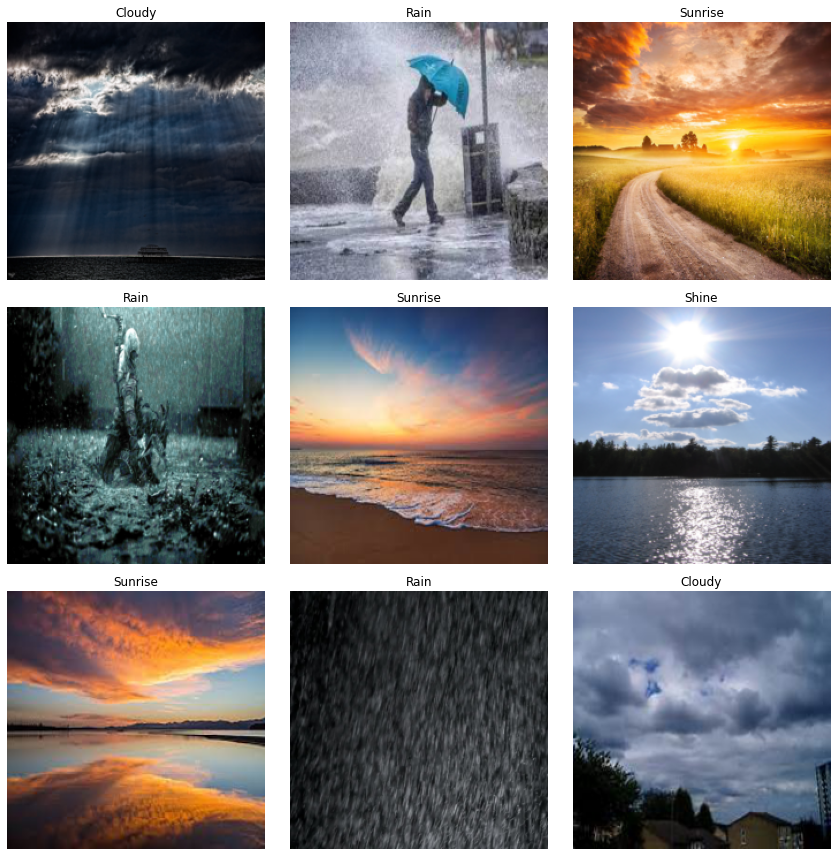

In [ ]:
# YOUR CODE HERE for plotting the images
import matplotlib.pyplot as plt
import numpy as np
L = 3
W = 3

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.reshape(-1)

for i in np.arange(0, L*W):
    axes[i].imshow(train_images[i].permute(1, 2, 0))
    axes[i].set_title(database.classes[train_labels[i].item()])
    axes[i].axis('off')

plt.tight_layout()

## **Stage2:** Build the Model

4 Marks -> Prepare the Model using any open-source pretrained model

1. Download a pre-trained model.
2. Fine tune or customize layers in the output to perform classification on a specific task.
3. Declare the loss function and optimizer
4. Print the summary of the model.

In [ ]:
# YOUR CODE HERE for preparing the model.
from torchvision import datasets, transforms, models
import torch.optim as optim

# Load the pretrained model from pytorch
vgg16 = models.vgg16(pretrained=True)
print(vgg16)



Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# Print the input features of 6th module from the classifier
num_features = vgg16.classifier[6].in_features
print(num_features)


# Remove last layer
features = list(vgg16.classifier.children())[:-1] 
print(features)

# Add the linear layer with 5 outputs
features.extend([nn.Linear(num_features, 4)])
print(features) 


4096
[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False)]
[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4, bias=True)]


In [ ]:

# Replace the model classifier
vgg16.classifier = nn.Sequential(*features) 
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(vgg16.parameters(), lr=0.003)

vgg16 = vgg16.to(device)

## **Stage 3:** Train the Model

4 Marks -> Train the Model and validate it continuously to calculate the loss and accuracy for the train dataset across each epoch.

**Expected training accuracy is above 93%**

In [ ]:
# YOUR CODE HERE

# Record loss and accuracy of the train dataset

# This code cell takes 20 mins to run

# No of Epochs
epoch = 5

# keeping the network in train mode
vgg16.train()
train_losses,  train_accuracy = [], []

# Loop for no of epochs
for e in range(epoch):
    train_loss = 0
    correct = 0
    # Iterate through all the batches in each epoch
    for images, labels in train_dl:

      # Convert the image and label to gpu for faster execution
      images = images.to(device)
      labels = labels.to(device)

      # Zero the parameter gradients
      optimizer.zero_grad()

      # Passing the data to the model (Forward Pass)
      outputs = vgg16(images)

      # Calculating the loss
      loss = criterion(outputs, labels)
      train_loss += loss.item()

      # Performing backward pass (Backpropagation)
      loss.backward()

      # optimizer.step() updates the weights accordingly
      optimizer.step()

      # Accuracy calculation
      _, predicted = torch.max(outputs, 1)
      correct += (predicted == labels).sum().item()

    train_losses.append(train_loss/len(train_ds))
    train_accuracy.append(100 * correct/len(train_ds))
    print('epoch: {}, Train Loss:{:.6f} Train Accuracy: {:.2f} '.format(e+1,train_losses[-1], train_accuracy[-1]))

epoch: 1, Train Loss:0.063408 Train Accuracy: 74.93 
epoch: 2, Train Loss:0.025245 Train Accuracy: 92.37 
epoch: 3, Train Loss:0.012371 Train Accuracy: 96.32 
epoch: 4, Train Loss:0.006441 Train Accuracy: 98.09 
epoch: 5, Train Loss:0.003994 Train Accuracy: 99.32 


## **Stage 4:** Evaluate the Model

4 Marks -> Evaluate the model for the test dataset and calculate the loss and accuracy.

**Expected performance of test evaluation is above 93%**

In [ ]:
# model.eval()
# YOUR CODE HERE for calculating the accuracy

# Keeping the network in evaluation mode 
vgg16.eval()  

Test_accuracy = 0

# Iterate through all the batches in each epoch
for images,labels in val_dl:
    # Convert the images and labels to gpu for faster execution
    images = images.to(device)
    labels = labels.to(device)

    # Do the forward pass 
    outputs = vgg16(images)

    # Accuracy calculation
    _, predicted = torch.max(outputs, 1)
    Test_accuracy += (predicted == labels).sum().item()

Accuracy = 100 * Test_accuracy / len(val_ds_main)
print("Accuracy of Test Data is", Accuracy)

Accuracy of Test Data is 95.65217391304348


## **Stage 5:** Report your observations on any two open source pre-trained models

2 Marks -> Report your observations

In [ ]:
# YOUR TEXT HERE on your observations